In [3]:
%%HTML
<h1 align = "center">Лабораторна робота №4</h1>

<h3 align = "center">Гулякевич Анни БС-83</h3>

<h4 align = "center">Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка</h4>

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as sts

Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20

In [6]:
data = pd.DataFrame({
    'Normal1': np.random.normal(loc=4, scale=10, size=20),
    'Normal2': np.random.normal(loc=10, scale=5, size=20),
    'Uniform': np.random.uniform(size=20),
    'Gamma': np.random.gamma(shape=5, size=20),
    'Binomial': np.random.binomial(n=25, p=0.5, size=20),
    'StandardNormal': np.random.standard_normal(size=20)
})
data

,Normal1,Normal2,Uniform,Gamma,Binomial,StandardNormal
0,-4.103963,13.712881,0.660305,7.409704,9,1.106506
1,-1.535287,10.213884,0.348315,5.264212,13,-1.934250
2,8.438442,6.961734,0.813328,2.056285,14,-0.256192
3,-4.894407,-1.340327,0.535120,5.549871,14,-0.904611
4,3.682924,7.892398,0.610721,8.357076,12,0.104405
5,6.963302,9.679404,0.235771,5.755084,13,0.107840
6,6.690314,12.868579,0.411839,4.118609,14,-0.212419
7,-5.896206,9.472515,0.571151,7.163598,17,-0.109017
8,26.164543,6.849247,0.452897,7.327019,14,0.030252
9,17.675458,17.339596,0.046668,3.481802,11,-0.089600


Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку

In [7]:
data = pd.DataFrame({key: sorted(values) for key, values in data.transpose().iterrows()})
data

,Normal1,Normal2,Uniform,Gamma,Binomial,StandardNormal
0,-8.982455,-1.340327,0.018444,2.056285,8.0,-1.934250
1,-6.104733,4.289581,0.046668,3.154355,9.0,-1.883806
2,-5.896206,5.044926,0.051224,3.481802,9.0,-1.367092
3,-5.519417,6.849247,0.227124,3.912876,10.0,-1.291487
4,-4.894407,6.961734,0.235771,3.942155,11.0,-0.904611
5,-4.103963,7.288853,0.242147,4.118609,11.0,-0.798285
6,-1.535287,7.892398,0.304621,5.146876,11.0,-0.699968
7,2.325155,9.286011,0.348315,5.190375,12.0,-0.407842
8,3.075299,9.472515,0.411839,5.264212,12.0,-0.358317
9,3.682924,9.679404,0.452897,5.517891,12.0,-0.256192


In [8]:
#За формулою шукаємо суму x' = 1/n * sum(x') - сума кожного стовпця
def Summary (arr,n):
    x_sum =0
    for i in range(n):
        x_sum +=arr[i]
    return x_sum/n
F_summary_1 = {i: Summary(data[i], 20) for i in data}

In [12]:
#Шукаємо S^2 за формулою S^2 = sum((x - x')^2 
def Square(arr, n, x):
    S2 = 0
    for i in range(n):
        S2 += ((arr[i] - x)**2)
    return S2
S_s2 = {i: Square(data[i], 20, F_summary_1[i]) for i in data}

In [13]:
#Беремо дані з таблиці
a_i = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140] 
#За формулою W = 1/S^2 * sum(a_i) * (x_n_i - x_i)
def W (arr, n, S_s2):
    tmp = 0
    for i in range(n//2):
        tmp +=(a_i[i] * (arr[(n-1)-i] - arr[i]))
    return tmp**2 /S_s2

W_val = {i: W(data[i], 20, S_s2[i]) for i in data}
W_f = {i: sts.shapiro(data[i]) for i in data}

print("Практичне значення: W_val = ", W_val)
print(' ')
print("За вбудованою формулою: W_f = ", W_f)

Практичне значення: W_val =  {'Normal1': 0.9339053496362857, 'Normal2': 0.9700005120446721, 'Uniform': 0.9647480583045012, 'Gamma': 0.9713219928928452, 'Binomial': 0.9749450669724767, 'StandardNormal': 0.960746331603707}
 
За вбудованою формулою: W_f =  {'Normal1': (0.9336962699890137, 0.18184825778007507), 'Normal2': (0.9700151681900024, 0.7551943063735962), 'Uniform': (0.9647694826126099, 0.6428223848342896), 'Gamma': (0.9712502360343933, 0.7810355424880981), 'Binomial': (0.9750365018844604, 0.8554941415786743), 'StandardNormal': (0.9606626033782959, 0.557170569896698)}


Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. 

In [14]:
headers = ['Variable', 'Statistics', 'Distribution']
new_data = pd.DataFrame(columns = headers)
new_data

,Variable,Statistics,Distribution


Занести в стовпчик Variable назви змінних.

In [15]:
new_data["Variable"] = data.keys()
new_data

,Variable,Statistics,Distribution
0,Normal1,NaN,NaN
1,Normal2,NaN,NaN
2,Uniform,NaN,NaN
3,Gamma,NaN,NaN
4,Binomial,NaN,NaN
5,StandardNormal,NaN,NaN


Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [16]:
new_data["Distribution"] = [('normal' if 'Normal' in dist else 'non-normal')
                          for dist in new_data["Variable"]]
new_data

,Variable,Statistics,Distribution
0,Normal1,NaN,normal
1,Normal2,NaN,normal
2,Uniform,NaN,non-normal
3,Gamma,NaN,non-normal
4,Binomial,NaN,non-normal
5,StandardNormal,NaN,normal


Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].

In [20]:

for i in range (new_data.shape[0]):
    varia = new_data["Variable"][i]
    if 'Normal' in varia:
        new_data["Statistics"][i] = f".{data[varia].mean()} [ {data[varia].std()} ]"
new_data

,Variable,Statistics,Distribution
0,Normal1,.4.918363657615191 [ 9.882912770019184 ],normal
1,Normal2,.10.858644745227362 [ 5.810952216028847 ],normal
2,Uniform,NaN,non-normal
3,Gamma,NaN,non-normal
4,Binomial,NaN,non-normal
5,StandardNormal,.-0.29795674492711777 [ 0.9117890440376623 ],normal


Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%]

In [21]:
for i in range (new_data.shape[0]):
    not_normal = new_data["Variable"][i]
    if 'Normal'not in not_normal:
        new_data["Statistics"][i] = f".{data[not_normal].median()} \
        [{data[not_normal].quantile(0.25)}; {data[not_normal].quantile(0.75)}]"

new_data

,Variable,Statistics,Distribution
0,Normal1,.4.918363657615191 [ 9.882912770019184 ],normal
1,Normal2,.10.858644745227362 [ 5.810952216028847 ],normal
2,Uniform,.0.45426326378222975 [0.24055294345702...,non-normal
3,Gamma,.5.533880974303043 [4.074495437645785;...,non-normal
4,Binomial,.12.5 [11.0; 14.0],non-normal
5,StandardNormal,.-0.29795674492711777 [ 0.9117890440376623 ],normal


Зберегти таблицю в пдф форматі

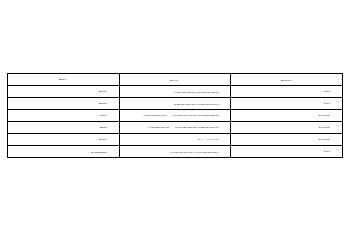

In [23]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(new_data)):
    cell_text.append(new_data.iloc[row])

ax.table(cellText=cell_text, colLabels=new_data.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()